# ECDF plots

In [38]:
library('tidyverse')
library('forcats')
options(repr.plot.res = 300)  # This is useful to get sensible default sizing

otter.data = read.csv('https://jcoliver.github.io/learn-r/data/otter-mandible-data.csv') %>%
    gather(characteristic, value, -species, -museum, -accession) %>%
    drop_na()

otter.data %>% head

species,museum,accession,characteristic,value
<fct>,<fct>,<fct>,<chr>,<dbl>
A. cinerea,AMNH,101458,m1,15.100
A. cinerea,AMNH,101461,m1,12.740
A. cinerea,AMNH,101466,m1,12.425
A. cinerea,AMNH,101635,m1,13.400
A. cinerea,AMNH,101459,m1,14.400
A. cinerea,AMNH,101462,m1,14.525


Make an ECDF plot of `value` and:
- facet by characteristic
- allow the x-axis of each facetted plot to be independent (hint use the `scales` argument)
- color/group by species  

Species names are typically italicized. Use `theme` and `element_text` to adjust the legend text so that it is italic.

Which otter species has the smallest skull?
The otter species has the smallest skull (smallest characteristics) would be P. Brasilliensis.

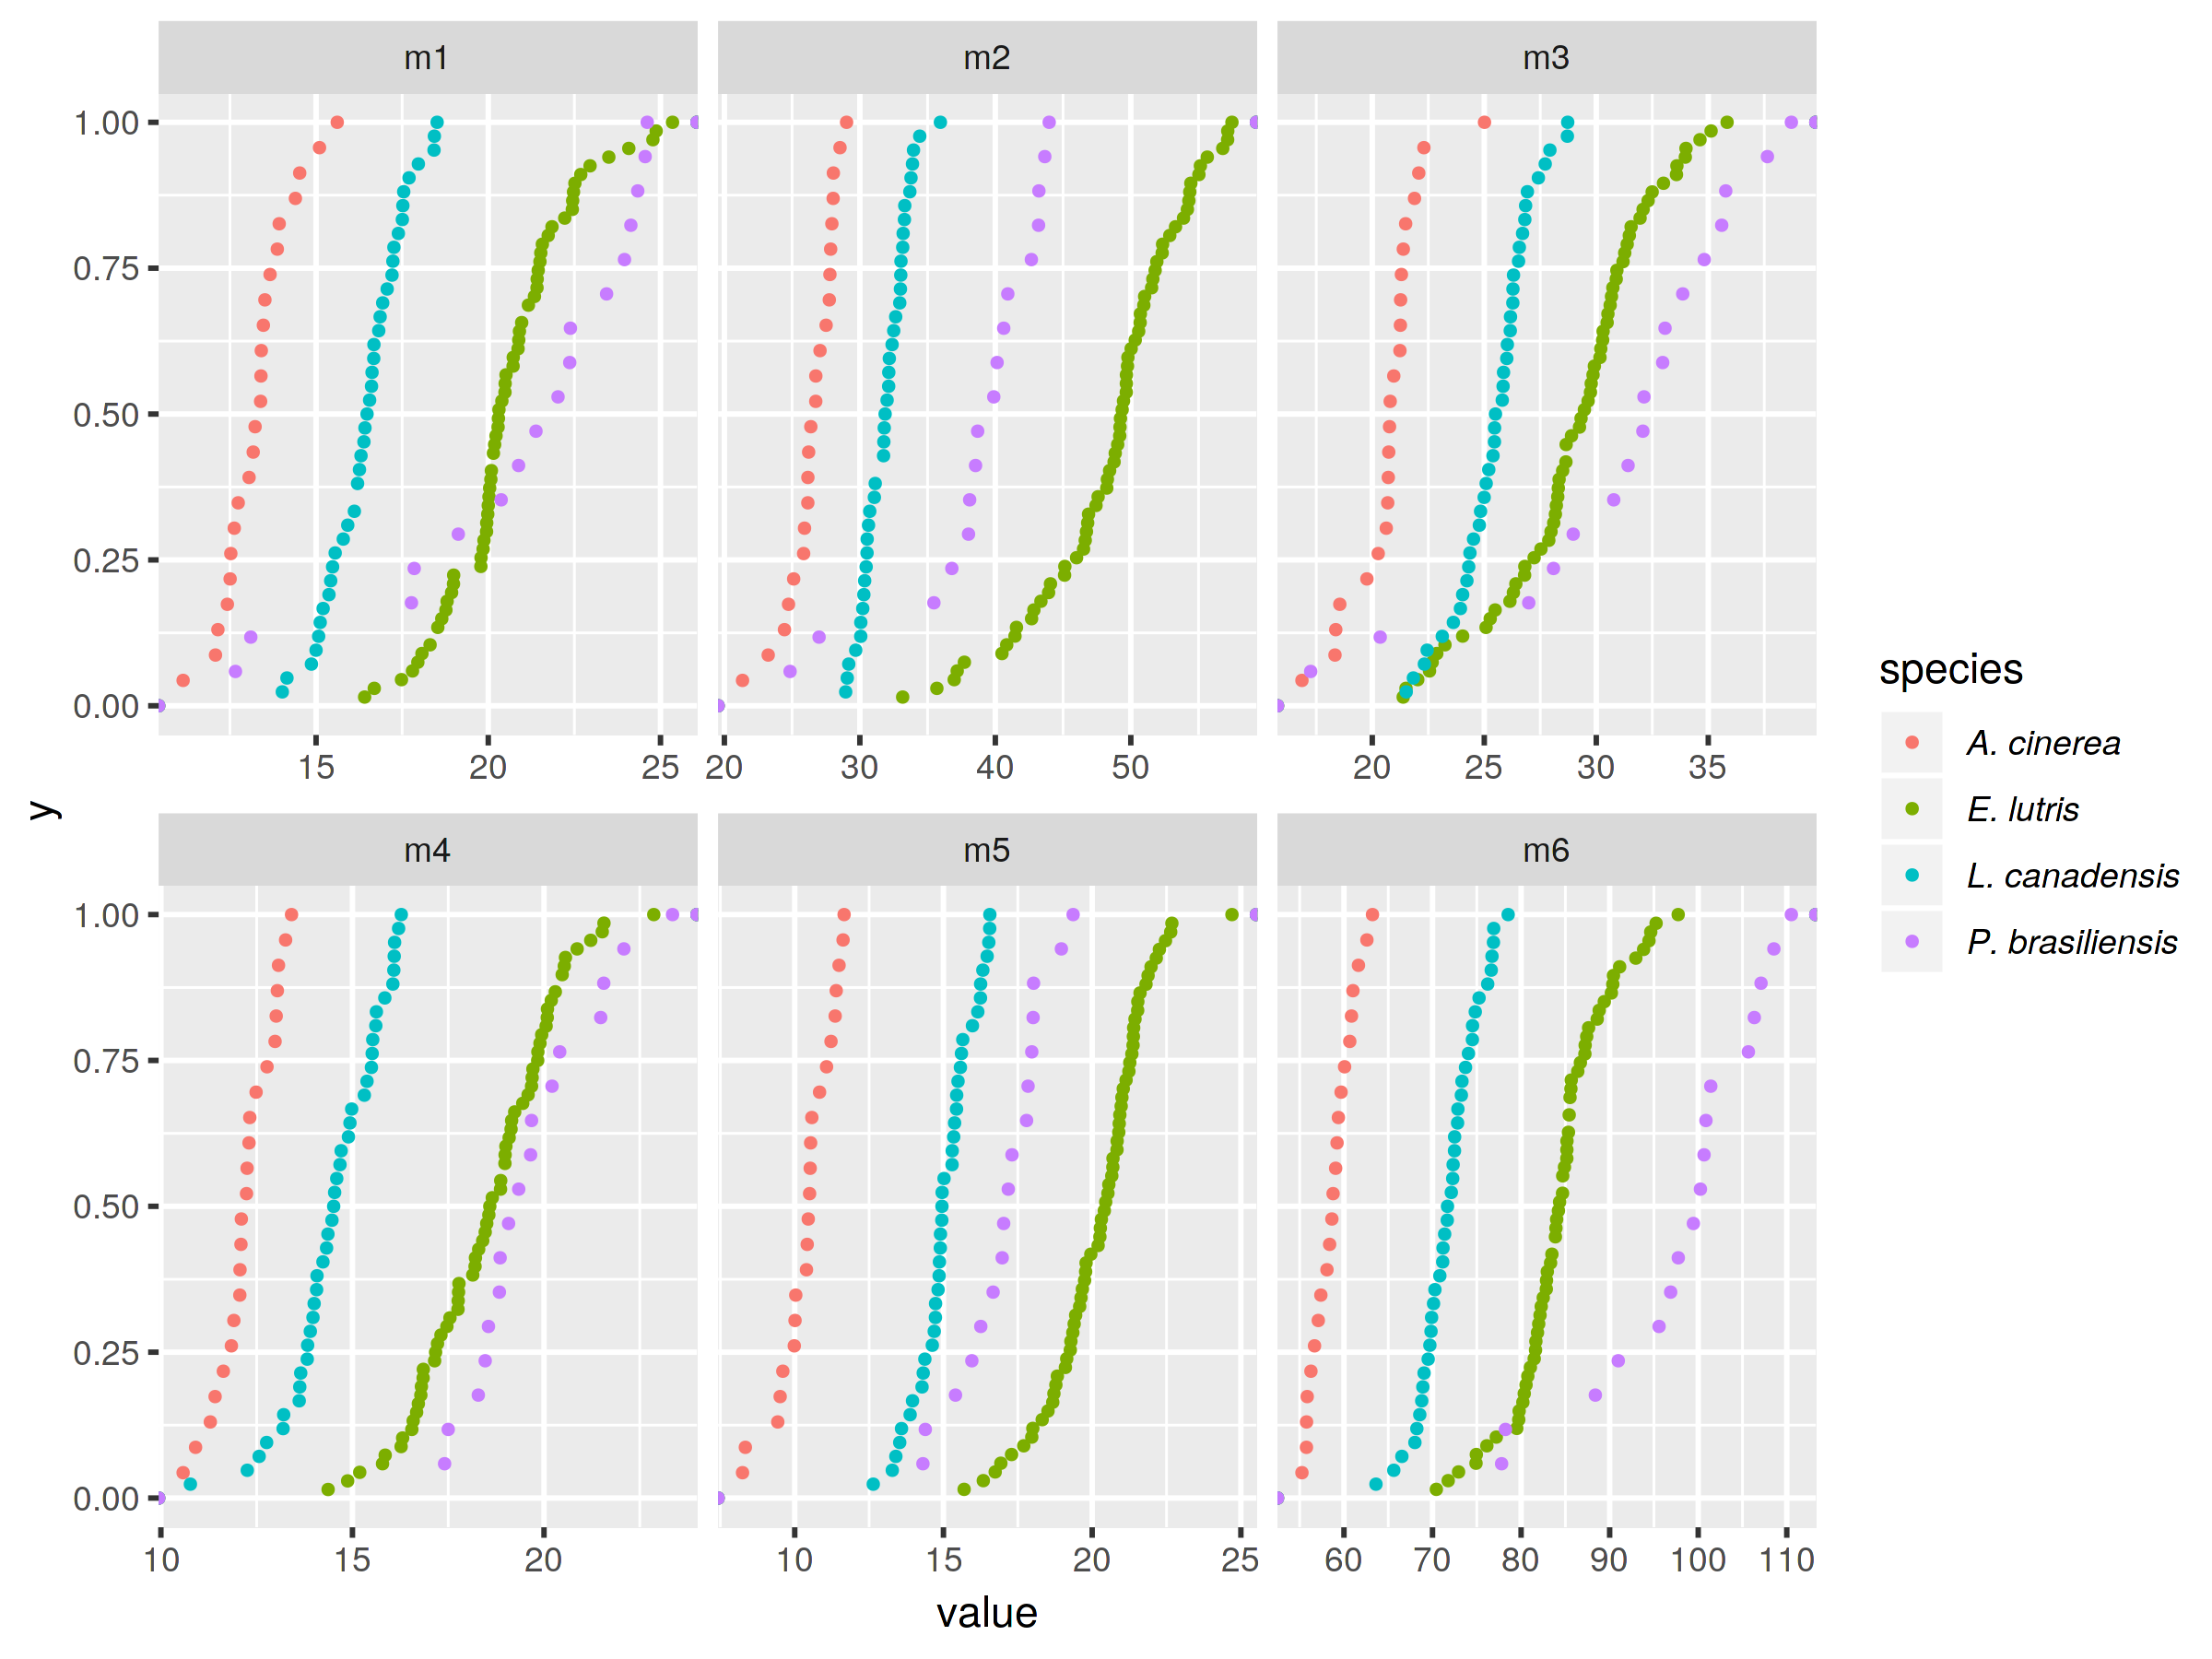

In [23]:
options(repr.plot.res = 300, repr.plot.height = 6, repr.plot.width = 8)
p = ggplot(otter.data, aes(x=value, color=species))
p = p + stat_ecdf(geom="point", size=0.75)
p = p + facet_wrap(~characteristic, scales="free_x")
p = p + theme(legend.text = element_text(face="italic"))
p

Make scatterplot of value vs. species by characteristics with jitter. Order species so their data displays in an appropriate order.

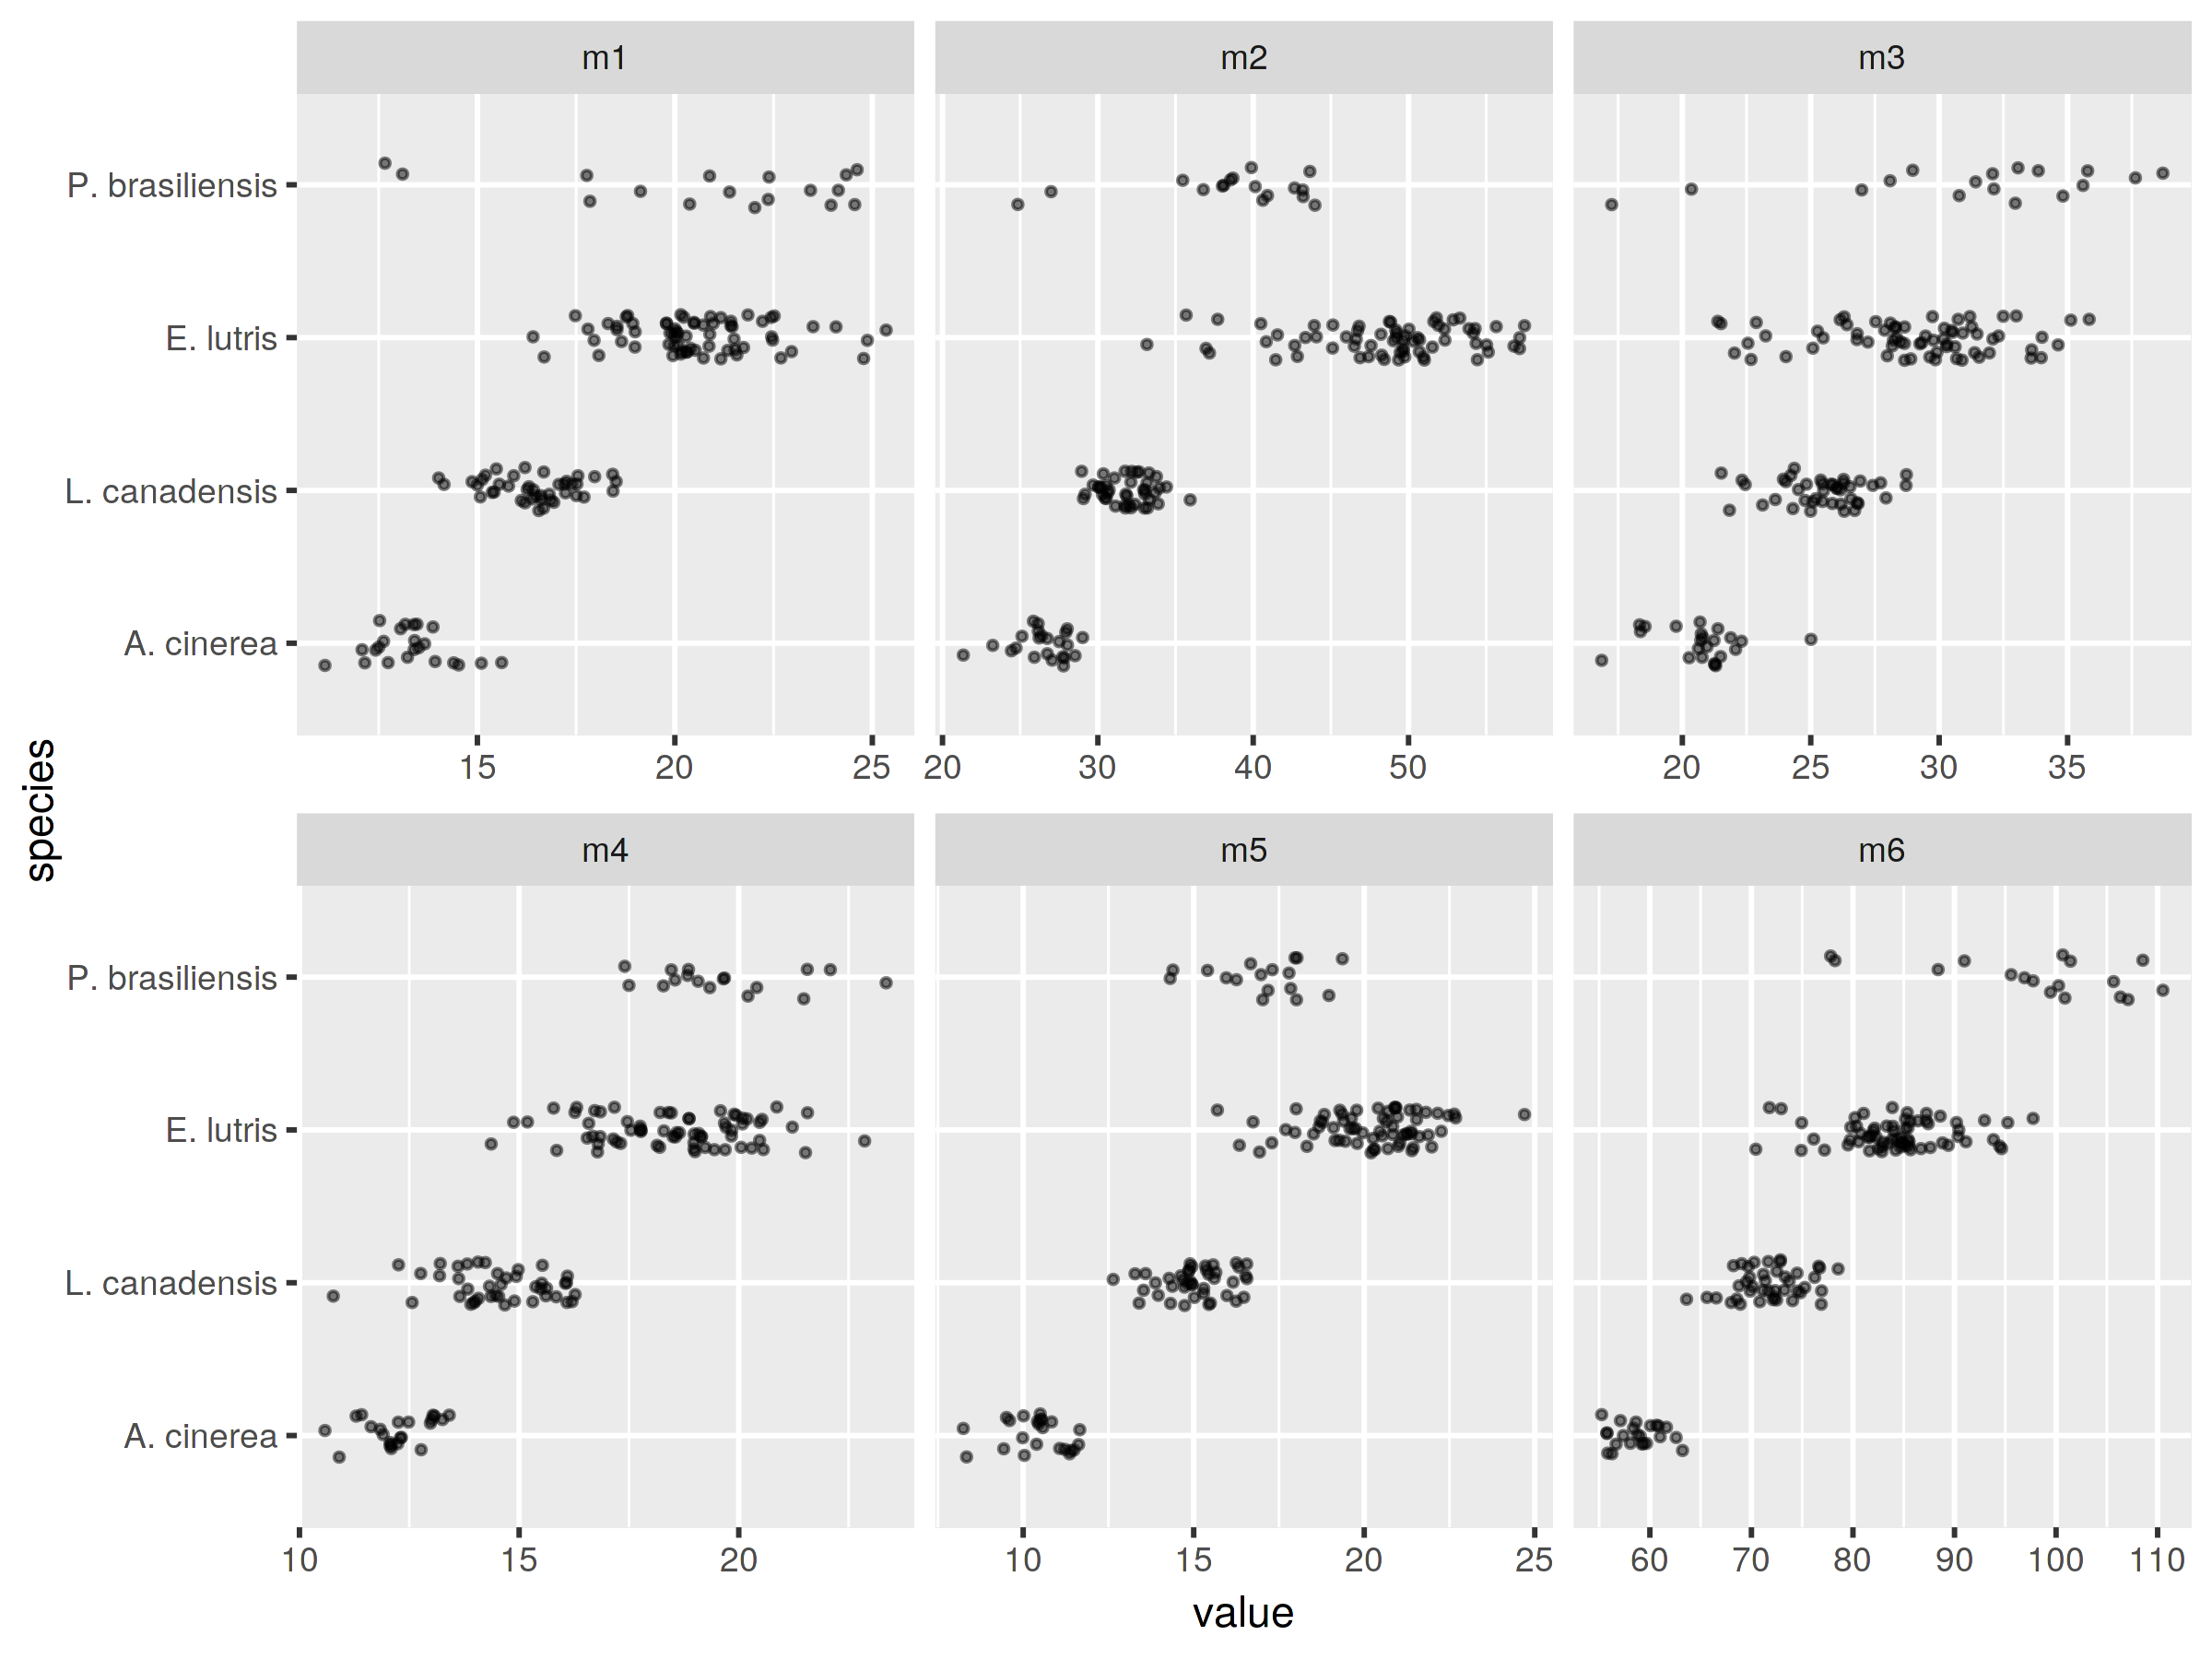

In [37]:
otter.data$species = factor(otter.data$species, level=c("A. cinerea",
                                                        "L. canadensis",
                                                        "E. lutris",
                                                        "P. brasiliensis"))

p = ggplot(otter.data, aes(x=value, y=species))
p = p + geom_point(position=position_jitter(h=0.15, w=0), size=0.75, alpha=0.5)
p = p + facet_wrap(~characteristic, scales="free_x")
p

In [42]:
# This is from library forcats

otter.data.new %>% mutate(species.new = fct_reorder(species, value))

ERROR: Error in eval(lhs, parent, parent): object 'otter.data.new' not found
